# Visualizing the reservoir network

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
import cartopy.io.shapereader as shpreader
# import contextily as cx
import geopandas as gpd

In [4]:
fn = f'../data/reservoir_network_pts/reservoir_network_pts.shp'
network_pts = gpd.read_file(fn, crs='epsg:4326')
network_pts.head()

,id,to_id,index_righ,name,lon,lat,dist [m],min_dist,geometry
0,72.0,111.0,11.0,Amon G Carter Dam,-97.860649,33.460267,1828.727754,1828.727754,POINT (-97.84375 33.46875)
1,160.0,197.0,0.0,Ray Roberts Dam,-97.052189,33.356409,2399.290440,2399.290440,POINT (-97.03125 33.34375)
2,214.0,180.0,12.0,Lost Creek Dam,-98.120395,33.244067,3745.732778,3745.732778,POINT (-98.09375 33.21875)
3,218.0,219.0,13.0,Bridgeport Dam,-97.832817,33.221504,1062.255739,1062.255739,POINT (-97.84375 33.21875)
4,290.0,316.0,1.0,Lewisville Dam,-96.969792,33.069896,2647.331779,2647.331779,POINT (-96.96875 33.09375)


In [5]:
fn = f'../data/reservoir_network/reservoir_network.shp'
network = gpd.read_file(fn, crs='epsg:4326')
network.head()

,from_id,to_id,from_name,to_name,length,geometry
0,11.0,14.0,Amon G Carter Dam,Eagle Mountain Dam,96366.152381,"LINESTRING (-97.84375 33.46875, -97.46875 32.8..."
1,14.0,15.0,Eagle Mountain Dam,Lake Worth Dam,108057.467965,"LINESTRING (-97.46875 32.84375, -97.40625 32.7..."
2,15.0,10.0,Lake Worth Dam,Livingston Dam,539407.507744,"LINESTRING (-97.40625 32.78125, -95.03125 30.6..."
3,0.0,1.0,Ray Roberts Dam,Lewisville Dam,36779.610536,"LINESTRING (-97.03125 33.34375, -96.96875 33.0..."
4,1.0,10.0,Lewisville Dam,Livingston Dam,457064.849005,"LINESTRING (-96.96875 33.09375, -95.03125 30.6..."


/Users/pdas47/courses/cuahsi_landlab/resnet/.condaenv/lib/python3.7/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_rivers_lake_centerlines_scale_rank.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


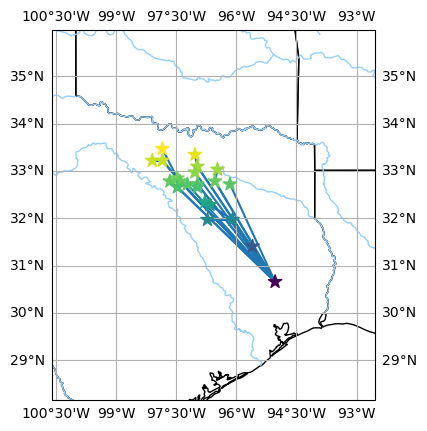

In [6]:
minx, miny, maxx, maxy = network.total_bounds

f = plt.figure()
ax = f.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_extent([minx - 2.5, maxx + 2.5, miny - 2.5, maxy + 2.5], crs=ccrs.PlateCarree())
network.plot(ax=ax)
network_pts.plot(ax=ax, markersize=100, marker='*', column='lat', zorder=10)

shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(resolution='10m', category='cultural', name=shapename)

def colorize_state(geometry):
    return {'facecolor': 'none', 'edgecolor': 'black'}

ax.add_geometries(
    shpreader.Reader(states_shp).geometries(),
    ccrs.PlateCarree(),
    styler=colorize_state)
# ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.NaturalEarthFeature(
    category='physical',
    name='rivers_lake_centerlines_scale_rank',
    scale='10m', facecolor='none', edgecolor='xkcd:light blue'
))
# ax.coastlines(resolution='50m')

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)



In [7]:
network.total_bounds

array([-98.09375,  30.65625, -95.03125,  33.46875])

# Get names of selected reservoirs

In [13]:
import geopandas as gpd
import os
import shutil

In [14]:
fn = f'../data/selected_reservoirs/selected_reservoirs.shp'
sel_res = gpd.read_file(fn)

sel_res

,DAM_ID,DAM_NAME,STATE,AGENCY_COD,LONG,LAT,TIME_SERIE,TIME_SER_1,INCONSISTE,geometry
0,1151,Ray Roberts Dam,Texas,ACE_FOR,-97.052189,33.356409,1987-06-30,2020-05-17,NA,POINT (-97.05219 33.35641)
1,1164,Lewisville Dam,Texas,TWDB,-96.969792,33.069896,1954-11-01,2020-12-31,NA,POINT (-96.96979 33.06990)
2,1170,Lavon Dam,Texas,DUKE,-96.469792,33.033002,1954-09-14,2015-09-30,NA,POINT (-96.46979 33.03300)
3,1171,Grapevine Dam,Texas,TWDB,-97.057957,32.972572,1952-07-02,2020-12-31,NA,POINT (-97.05796 32.97257)
4,1183,Rockwall Forney Dam,Texas,TWDB,-96.501952,32.802749,1980-01-01,2020-12-31,NA,POINT (-96.50195 32.80275)
5,1188,Mountain Creek Dam,Texas,TWDB,-96.943750,32.730483,1960-10-02,2020-12-31,NA,POINT (-96.94375 32.73048)
6,1194,Benbrook Lake,Texas,TWDB,-97.455208,32.651213,1952-10-02,2020-12-31,NA,POINT (-97.45521 32.65121)
7,1197,Joe Pool Lake,Texas,DUKE,-96.988542,32.642259,1986-01-06,2015-09-30,NA,POINT (-96.98854 32.64226)
8,1220,Bardwell Lake,Texas,TWDB,-96.647908,32.252524,1965-11-02,2020-12-31,NA,POINT (-96.64791 32.25252)
9,1237,Navarro Mills Dam,Texas,ACE_FOR,-96.698596,31.953148,1981-09-30,2020-05-17,NA,POINT (-96.69860 31.95315)


In [18]:
# get these time-series datasets from the larger ground-truth repository
all_data_prefix = "/Users/pdas47/phd/Ground-Truth/USA/ResOpsUS/time_series_all"

for res_id in sel_res['DAM_ID']:
    src_fn = os.path.join(all_data_prefix, f"ResOpsUS_{res_id}.csv")
    dst_fn = f'../data/ts/{res_id}.csv'
    shutil.copy(src_fn, dst_fn)